In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [60]:
df=pd.read_csv("E:\\Data Trained\\Internship\\Project-Housing--2-\\Project-Housing_splitted\\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
df1=pd.read_csv("E:\\Data Trained\\Internship\\Project-Housing--2-\\Project-Housing_splitted\\test.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [6]:
df.shape

(1168, 81)

In [7]:
df1.shape

(292, 80)

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [36]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
df1.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

<AxesSubplot:>

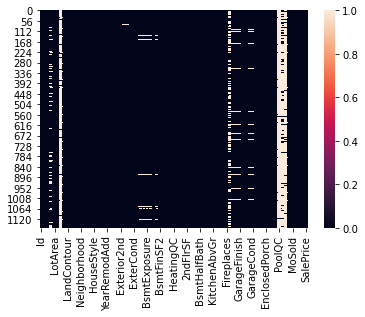

In [8]:
sn.heatmap(df.isnull())

In [61]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=lb.fit_transform(df[i].values.reshape(-1,1))

In [62]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,NaN,4928,1,2,0,3,0,...,0,3,4,4,0,2,2007,8,4,128000
1,889,20,3,95.0,15865,1,2,0,3,0,...,0,3,4,4,0,10,2007,8,4,268000
2,793,60,3,92.0,9920,1,2,0,3,0,...,0,3,4,4,0,6,2007,8,4,269790
3,110,20,3,105.0,11751,1,2,0,3,0,...,0,3,2,4,0,1,2010,0,4,190000
4,422,20,3,NaN,16635,1,2,0,3,0,...,0,3,4,4,0,6,2009,8,4,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,3,NaN,9819,1,2,0,3,0,...,0,3,2,4,0,2,2010,8,4,122000
1164,554,20,3,67.0,8777,1,2,3,3,0,...,0,3,2,4,0,5,2009,8,4,108000
1165,196,160,3,24.0,2280,1,2,3,3,0,...,0,3,4,4,0,7,2009,8,4,148500
1166,31,70,0,50.0,8500,1,1,3,3,0,...,0,3,2,4,0,7,2008,8,4,40000


In [66]:
df.drop(['PoolQC'],axis=1, inplace=True)

In [69]:
df1.drop(['PoolQC'],axis=1, inplace=True)

In [82]:
df1.drop(['GarageFinish'],axis=1, inplace=True)

In [83]:
df.drop(['GarageFinish'],axis=1, inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=lb.fit_transform(df1[i].values.reshape(-1,1))

In [13]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,2,86.0,14157,1,2,0,1,0,...,0,0,NaN,4,2,0,7,2007,5,2
1,1018,120,2,NaN,5814,1,2,0,3,0,...,0,0,NaN,4,2,0,8,2009,0,0
2,929,20,2,NaN,11838,1,2,3,3,0,...,0,0,NaN,4,2,0,6,2009,5,2
3,1148,70,2,75.0,12000,1,2,3,0,0,...,0,0,NaN,4,2,0,7,2009,5,2
4,1227,60,2,86.0,14598,1,2,0,3,0,...,0,0,NaN,4,2,0,1,2008,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,2,78.0,10206,1,2,3,3,0,...,0,0,NaN,4,2,0,10,2008,5,2
288,1048,20,2,57.0,9245,1,2,1,3,0,...,0,0,NaN,4,2,0,2,2008,5,2
289,17,20,2,NaN,11241,1,2,0,3,0,...,0,0,NaN,4,1,700,3,2010,5,2
290,523,50,3,50.0,5000,1,2,3,3,0,...,0,0,NaN,4,2,0,10,2006,5,2


In [87]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['Alley'] = df['Alley'].fillna(df['Alley'].mode())
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode())
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode())
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode())
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode())
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode())
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode())
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode())
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode())
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode())
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode())
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode())
df['Fence'] = df['Fence'].fillna(df['Fence'].mode())
df['MiscFeature'] = df['MiscFeature'].fillna(df['MiscFeature'].mode())
df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].mode())

In [68]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [94]:
df.isnull().sum().sum()

71

In [88]:
df1['LotFrontage'] = df1['LotFrontage'].fillna(df1['LotFrontage'].mean())
df1['Alley'] = df1['Alley'].fillna(df1['Alley'].mode())
df1['BsmtQual'] = df1['BsmtQual'].fillna(df1['BsmtQual'].mode())
df1['BsmtCond'] = df1['BsmtCond'].fillna(df1['BsmtCond'].mode())
df1['BsmtExposure'] = df1['BsmtExposure'].fillna(df1['BsmtExposure'].mode())
df1['BsmtFinType1'] = df1['BsmtFinType1'].fillna(df1['BsmtFinType1'].mode())
df1['BsmtFinType2'] = df1['BsmtFinType2'].fillna(df1['BsmtFinType2'].mode())
df1['BsmtFinType2'] = df1['BsmtFinType2'].fillna(df1['BsmtFinType2'].mode())
df1['Electrical'] = df1['Electrical'].fillna(df1['Electrical'].mode())
df1['FireplaceQu'] = df1['FireplaceQu'].fillna(df1['FireplaceQu'].mode())
df1['GarageType'] = df1['GarageType'].fillna(df1['GarageType'].mode())
df1['GarageYrBlt'] = df1['GarageYrBlt'].fillna(df1['GarageYrBlt'].mode())
df1['GarageQual'] = df1['GarageQual'].fillna(df1['GarageQual'].mode())
df1['GarageCond'] = df1['GarageCond'].fillna(df1['GarageCond'].mode())
df1['Fence'] = df1['Fence'].fillna(df1['Fence'].mode())
df1['MiscFeature'] = df1['MiscFeature'].fillna(df1['MiscFeature'].mode())
df1['GarageCars'] = df1['GarageCars'].fillna(df1['GarageCars'].mode())

In [71]:
df1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

<AxesSubplot:>

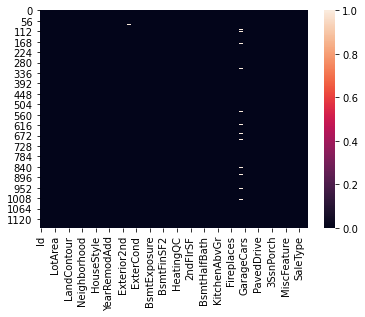

In [89]:
sn.heatmap(df.isnull())

<AxesSubplot:>

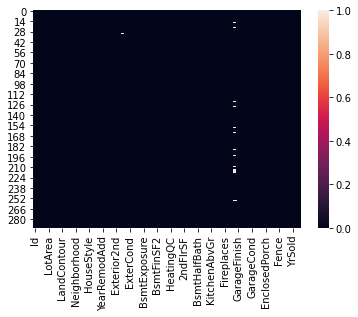

In [74]:
sn.heatmap(df1.isnull())

# Visualization

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

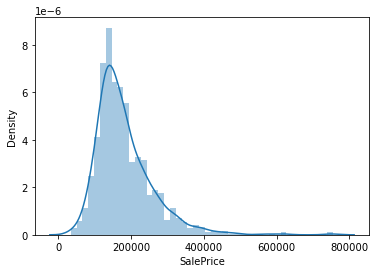

In [21]:
sn.distplot(df['SalePrice'], kde=True)

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

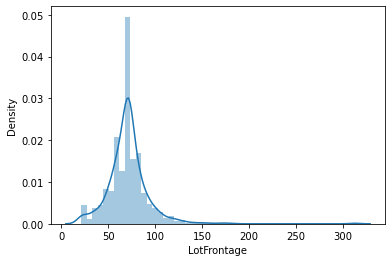

In [22]:
sn.distplot(df['LotFrontage'], kde=True)

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

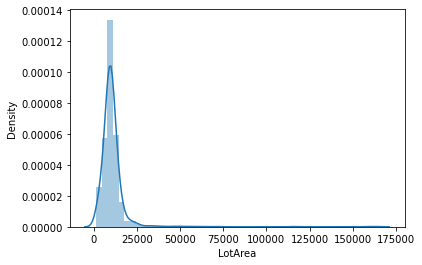

In [23]:
sn.distplot(df['LotArea'], kde=True)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

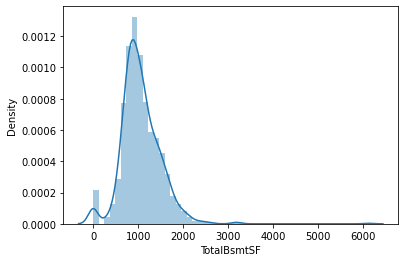

In [24]:
sn.distplot(df['TotalBsmtSF'], kde=True)

# Describe the Dataset

In [25]:
df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,3.013699,70.988470,10484.749144,0.996575,1.898973,1.938356,2.773973,0.0,...,3.448630,2.988870,3.475171,3.921233,47.315068,6.344178,2007.804795,7.465753,3.768836,181477.005993
std,416.159877,41.940650,0.633120,22.437056,8957.442311,0.058445,0.401453,1.412262,0.710027,0.0,...,44.896939,0.157245,1.112090,0.408514,543.264432,2.686352,1.329738,1.619459,1.112208,79105.586863
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,360.500000,20.000000,3.000000,60.000000,7621.500000,1.000000,2.000000,0.000000,3.000000,0.0,...,0.000000,3.000000,4.000000,4.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,130375.000000
50%,714.500000,50.000000,3.000000,70.988470,9522.500000,1.000000,2.000000,3.000000,3.000000,0.0,...,0.000000,3.000000,4.000000,4.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163995.000000
75%,1079.500000,70.000000,3.000000,79.250000,11515.500000,1.000000,2.000000,3.000000,3.000000,0.0,...,0.000000,3.000000,4.000000,4.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,215000.000000
max,1460.000000,190.000000,4.000000,313.000000,164660.000000,1.000000,2.000000,3.000000,3.000000,0.0,...,738.000000,3.000000,4.000000,4.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


In [26]:
df.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.004259,0.009307,-0.005969,-0.029212,0.003613,0.008284,0.022978,-0.020245,NaN,...,0.065832,-0.039536,-0.002688,0.010572,0.001304,0.023479,-0.008853,0.024384,-0.014726,-0.023897
MSSubClass,0.004259,1.000000,0.007478,-0.336681,-0.124151,-0.035981,-0.141808,0.104485,-0.021387,NaN,...,0.009583,-0.006109,0.112138,0.048646,-0.023503,-0.016015,-0.038595,0.035050,-0.028981,-0.060775
MSZoning,0.009307,0.007478,1.000000,-0.069661,-0.023328,0.140215,-0.051864,0.053655,0.001175,NaN,...,-0.001663,0.001533,-0.070105,0.010802,0.003416,-0.051646,-0.004964,0.079854,0.004501,-0.133221
LotFrontage,-0.005969,-0.336681,-0.069661,1.000000,0.299452,-0.035309,0.134206,-0.144523,-0.073451,NaN,...,0.196001,-0.207693,-0.052913,0.004421,-0.001329,0.022517,-0.003885,-0.035356,0.065091,0.323779
LotArea,-0.029212,-0.124151,-0.023328,0.299452,1.000000,-0.263973,0.073073,-0.189201,-0.159038,NaN,...,0.097107,-0.081488,0.030193,-0.146562,0.051679,0.015141,-0.035399,0.005421,0.034236,0.249499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.023479,-0.016015,-0.051646,0.022517,0.015141,-0.008860,0.033064,-0.050418,-0.023872,NaN,...,-0.038624,0.041533,-0.004882,-0.019002,-0.008773,1.000000,-0.144536,-0.063667,-0.003462,0.072764
YrSold,-0.008853,-0.038595,-0.004964,-0.003885,-0.035399,-0.019635,0.022418,0.021421,0.009499,NaN,...,-0.066063,0.067465,-0.041525,-0.036217,-0.008439,-0.144536,1.000000,0.013606,0.024505,-0.045508
SaleType,0.024384,0.035050,0.079854,-0.035356,0.005421,0.025920,0.014444,-0.015161,-0.041763,NaN,...,0.014047,-0.016640,-0.000235,0.003691,0.015900,-0.063667,0.013606,1.000000,0.143557,-0.050851
SaleCondition,-0.014726,-0.028981,0.004501,0.065091,0.034236,0.014176,0.055123,-0.054905,0.047715,NaN,...,-0.074354,0.107767,0.107588,0.012698,0.012178,-0.003462,0.024505,0.143557,1.000000,0.217687


<AxesSubplot:>

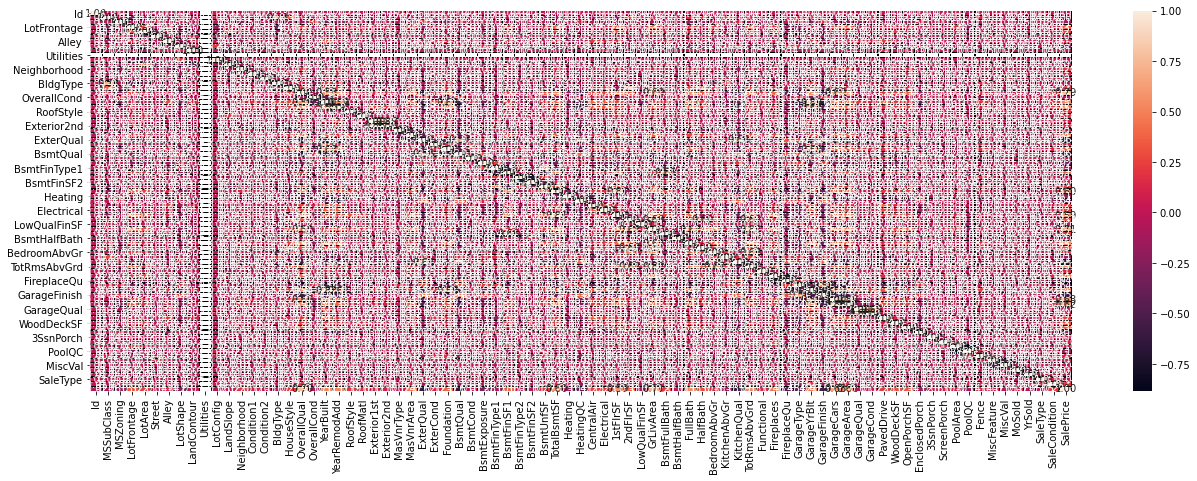

In [27]:
plt.figure(figsize=(22,7))
sn.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Outlier

<AxesSubplot:>

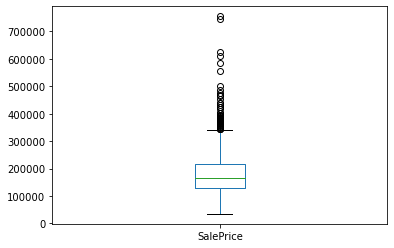

In [28]:
df['SalePrice'].plot.box()

<AxesSubplot:>

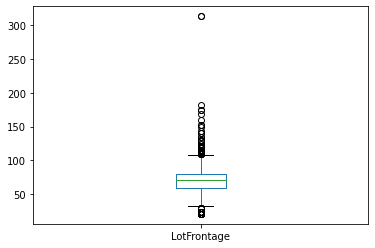

In [29]:
df['LotFrontage'].plot.box()

<AxesSubplot:>

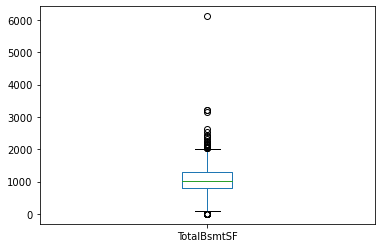

In [31]:
df['TotalBsmtSF'].plot.box()

In [77]:
x=df.iloc[:,:-1]
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,127,120,3,70.98847,4928,1,2,0,3,0,...,0,0,0,4,4,0,2,2007,8,4
1,889,20,3,95.00000,15865,1,2,0,3,0,...,0,224,0,4,4,0,10,2007,8,4
2,793,60,3,92.00000,9920,1,2,0,3,0,...,0,0,0,4,4,0,6,2007,8,4
3,110,20,3,105.00000,11751,1,2,0,3,0,...,0,0,0,2,4,0,1,2010,0,4
4,422,20,3,70.98847,16635,1,2,0,3,0,...,0,0,0,4,4,0,6,2009,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,3,70.98847,9819,1,2,0,3,0,...,0,0,0,2,4,0,2,2010,8,4
1164,554,20,3,67.00000,8777,1,2,3,3,0,...,0,0,0,2,4,0,5,2009,8,4
1165,196,160,3,24.00000,2280,1,2,3,3,0,...,0,0,0,4,4,0,7,2009,8,4
1166,31,70,0,50.00000,8500,1,1,3,3,0,...,0,0,0,2,4,0,7,2008,8,4


In [78]:
y=df.iloc[:,-1]
y

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=79)

In [47]:
x_train.shape

(782, 80)

In [49]:
y_train.shape

(782,)

In [50]:
x_test.shape

(386, 80)

In [51]:
y_test.shape

(386,)

In [54]:
x2=df1

In [81]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType           int32
SaleCondition      int32
SalePrice          int64
Length: 80, dtype: object

In [52]:
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [53]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [92]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred1=dt.predict(x_test)
print(r2_score(y_test,pred))


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').